# Task 01: Solar Dish with Stirling Engine

The exercise is described on the teaching wiki: https://teawiki.net/doku.php?id=solar_dish:start

Well-structured Jupyter Notebook (Python) as short(!) but complete scientific report! Do not just implement code but also motivate and explain your work in formatted markdown cells.
Video presentation about your work.

**1- What is concentrated solar power? What are advantages and disadvantages compared to photovoltaics?**

Concentrated solar power is used in solar thermal power plants. Incoming irradiance is concentrated by mirrors and focused on a thermal collector, where a medium is heated. The most common approach is to use parabolic troughs heating up collector pipes in the focal line of the troughs. The collector pipes are filled with a heat transfer fluid transporting the thermal energy to a heat engine (e.g. a steam turbine) connected to an electrical generator.

**2- Is there any significant large scale CSP plant implementation?**

There are many of conccentrated solar power plants in the world, the largest one is Ouarzazate Solar Power Station Morocco that can produce up to 400GWH per year. Plenty of other stations worldwide are listed under this link https://en.wikipedia.org/wiki/List_of_solar_thermal_power_stations

**3- Assume you were an investor. Where in Europe would you try to install a large scale SCP plant? Explain.**

I would think of the sunniest city at first which is Valletta in Malta which had 2957 hours of sun in 2020. [1] <br>
Because the most the sun shine on the mirrors, the most heat will be colected which turn the turbine and generate more energy.<br>
Of course we should take into consideration other important factors such as the political situation in the country, as well as economical, geographical and other important factors. For example Malta is an island in the middle of the mediteranean sea at the south borders of Italy and it has only about half a million population, and considering doing a big power plant to generate hundreds of GWH per year we should find a way to sell this electricity to neighboring countries, which would be very expensive. That's why looking at other factors, I will consider Marseille, France which had 2858 hours of sun in 2020, as a better choice.

**4- What do “direct normal irradiation” and “global horizontal irradiation” in the above diagrams mean?**

Direct Normal Irradiance (DNI) is measured with a surface element perpendicular to the Sun at any given location at the earth surface. It excludes diffuse solar radiation. Direct irradiance is equal to the extraterrestrial irradiance above the atmosphere minus the atmospheric losses due to absorption and scattering. 

Global Horizontal Irradiance (GHI) is the total irradiance from the sun on a horizontal surface on Earth. It is the sum of direct irradiance (after accounting for the solar zenith angle of the sun z) and diffuse horizontal irradiance.

**5- Assume the Dish-Stirling-System were equipped with a solar tracker collecting the direct normal component. What is the approximate(!) irradiation energy per year in Almería (Spain) per 1 m² of solar collector? Read it from the diagrams above. The rough value ranges given by the color scale are sufficient for a rough estimate.**

According to the diagram, the average (DNI) in Almeria Spain is approximately 2556kWh/m²

**6- Describe the working principle of a Stirling engine.**

The Stirling Engine relies on the property of gases that they expand when heated and contract when cooled. (Charles' Law). If the gas is contained within a fixed volume, its pressure will increase on heating and decrease on cooling.
If the gas is held in a variable volume container, constructed from a movable piston in a cylinder closed at one end, the pressure increases and decreases will cause the piston to move out and in. Repeated heating and cooling will cause a reciprocating movement of the piston which can be converted to rotary motion using a conventional connecting rod and a crankshaft with a flywheel.

**7- Analyse the Stirling engine the P-V-diagram of which is shown above. Start with the ideal cycle. Take one of the corner points of the isothermals (400K and 850K). Assume air to be the working gas (diatomic). How many moles of air are in the machine?**

**8- What are the total heat capacities under constant volume and constant pressure?**

Please find a detailed video under this link:<br>
https://youtu.be/cKPyViic5CU

In [1]:
import numpy as np
import scipy.constants as sc
R = sc.R
import math
from numpy import log
import pandas as pd

In [2]:
pA = 135000 #p in Pascal
print (pA)

135000


In [3]:
VA = 86.75 * 10**-6 #Volume in (m^3) cubic meter
print (VA)

8.675e-05


In [4]:
TA = TB = 400 #T in Kelvin

In [5]:
R = 8.314 #gas constant in #J/(m.K)

In [6]:
n = pA*VA/(R*TA)
float("{0:.4f}".format(n))

0.0035

In [7]:
f= 5 #diatomic gas degrees of freedom = 5
cv = (f/2)*R
Cv = n*cv # J/K
float("{0:.3f}".format(Cv))

0.073

In [8]:
VB = 36.5 * 10**-6 #Volume in (m^3) cubic meter
print (VB)

3.65e-05


In [9]:
TC = TD = 850 #T in Kelvin

In [10]:
VC = VB #Volume in (m^3) cubic meter
VD = VA

In [11]:
pB = pA*VA*TB/(VB*TA) #p in Pascal
float("{0:.2f}".format(pB))

320856.16

In [12]:
pC = pA*VA*TC/(VC*TA) #p in Pascal
float("{0:.2f}".format(pC))

681819.35

In [13]:
pD = pA*VA*TD/(VD*TA) #p in Pascal
float("{0:.2f}".format(pD))

286875.0

In [14]:
p = np.array([pA, pB, pC, pD]) #p in Pascal
print (p)

[135000.         320856.16438356 681819.34931507 286875.        ]


In [15]:
V = np.array([VA,VB,VC,VD]) #Volume in (m^3) cubic meter
print (V)

[8.675e-05 3.650e-05 3.650e-05 8.675e-05]


In [16]:
T = np.array([TA,TB,TC,TD]) #T in Kelvin
print (T)

[400 400 850 850]


In [17]:
pC/pB #increasing the pressure by a factor of 2.13

2.125

**9- In the lectures on thermodynamic cycles we set up and filled a table containing thermodynamic states as well as state transitions (aka processes). Set up a similar table or even better two tables: One state table with states A,B,C,D and one process table with state transitions 1 (A→B), 2 (B→C), 3 (C→D), 4 (D→A). Fill the table for the Stirling machine under investigation (P-V-diagram above). Read the values from the diagram (as good as you can). Temperatures are given.**

In [18]:
ΔT = np.array([T[1]-T[0], T[2]-T[1], T[3]-T[2], T[0]-T[3]]) #ΔT in Kelvin
print (ΔT)

[   0  450    0 -450]


In [19]:
ΔU = Cv * ΔT # ΔU in joules
print(ΔU)

[  0.          32.93789063   0.         -32.93789063]


In [20]:
WAB = -n*R*TA*math.log(VB/VA) #W in joules
float("{0:.2f}".format(WAB))

10.14

In [21]:
WCD = -n*R*TC*math.log(VD/VC) #W in joules
float("{0:.2f}".format(WCD))

-21.54

In [22]:
WDA = 0
WBC = 0
# 0 because we are just extracting or adding heat from or to the gas
# but no change in volume and no work done on the system or by the gas.

In [23]:
W = np.array([WAB, WBC, WCD, WDA]) #W in joules
print(W)

[ 10.13864178   0.         -21.54461378   0.        ]


In [24]:
Q = ΔU - W #Q in joules
print(Q)

[-10.13864178  32.93789063  21.54461378 -32.93789063]


In [25]:
Qtotal = sum(map(int, Q)) #Q in joules
print (Qtotal)

11


In [26]:
Table1 = pd.read_csv(r'Data/Table1.csv',
                     index_col="State Process")
Table1

,Pressure (Pa),Volume(m^3),Temperature (K)
State Process,,,
A,135000.00,8.67*10^-5,400
B,320856.00,3.65*10^-5,400
C,681819.34,3.65*10^-5,850
D,286875.00,8.65*10^-5,850


In [27]:
Table2 = pd.read_csv(r'Data/Table2.csv',
                     index_col="State Process")
Table2

,Delta U (J),Q (J),W (J),Delta T (K)
State Process,,,,
A to B (isothermal compression heat removal),0.00,-10.13,10.13,0
B to C (isochoric heating),32.93,32.93,0.00,450
C to D ( isothermal heat addition),0.00,21.54,-21.54,0
D to A (isochoric cooling),-32.93,-32.93,0.00,-450
Total,0.00,11.41,-11.41,0


**10- Draw the P-V-diagram of your calculations with matplotlib! Make it dynamic, i.e. use variables (not fixed values) such that the diagram can be recreated easily when parameters of the Stirling engine are changed (temperatures, volumes, gas type, etc.).**

In [28]:
V_1 = np.linspace (VC, VD, 200)
P_1 = (n*R*TC)/V_1

In [29]:
V_2 = np.linspace (VB, VA, 200)
P_2 = (n*R*TB)/V_2

In [30]:
P_3 = np.linspace (pB, pC, 100)
V_3 = np.linspace (VB, VC, 100)

In [31]:
P_4 = np.linspace (pA, pD, 100)
V_4 = np.linspace (VA, VD, 100)

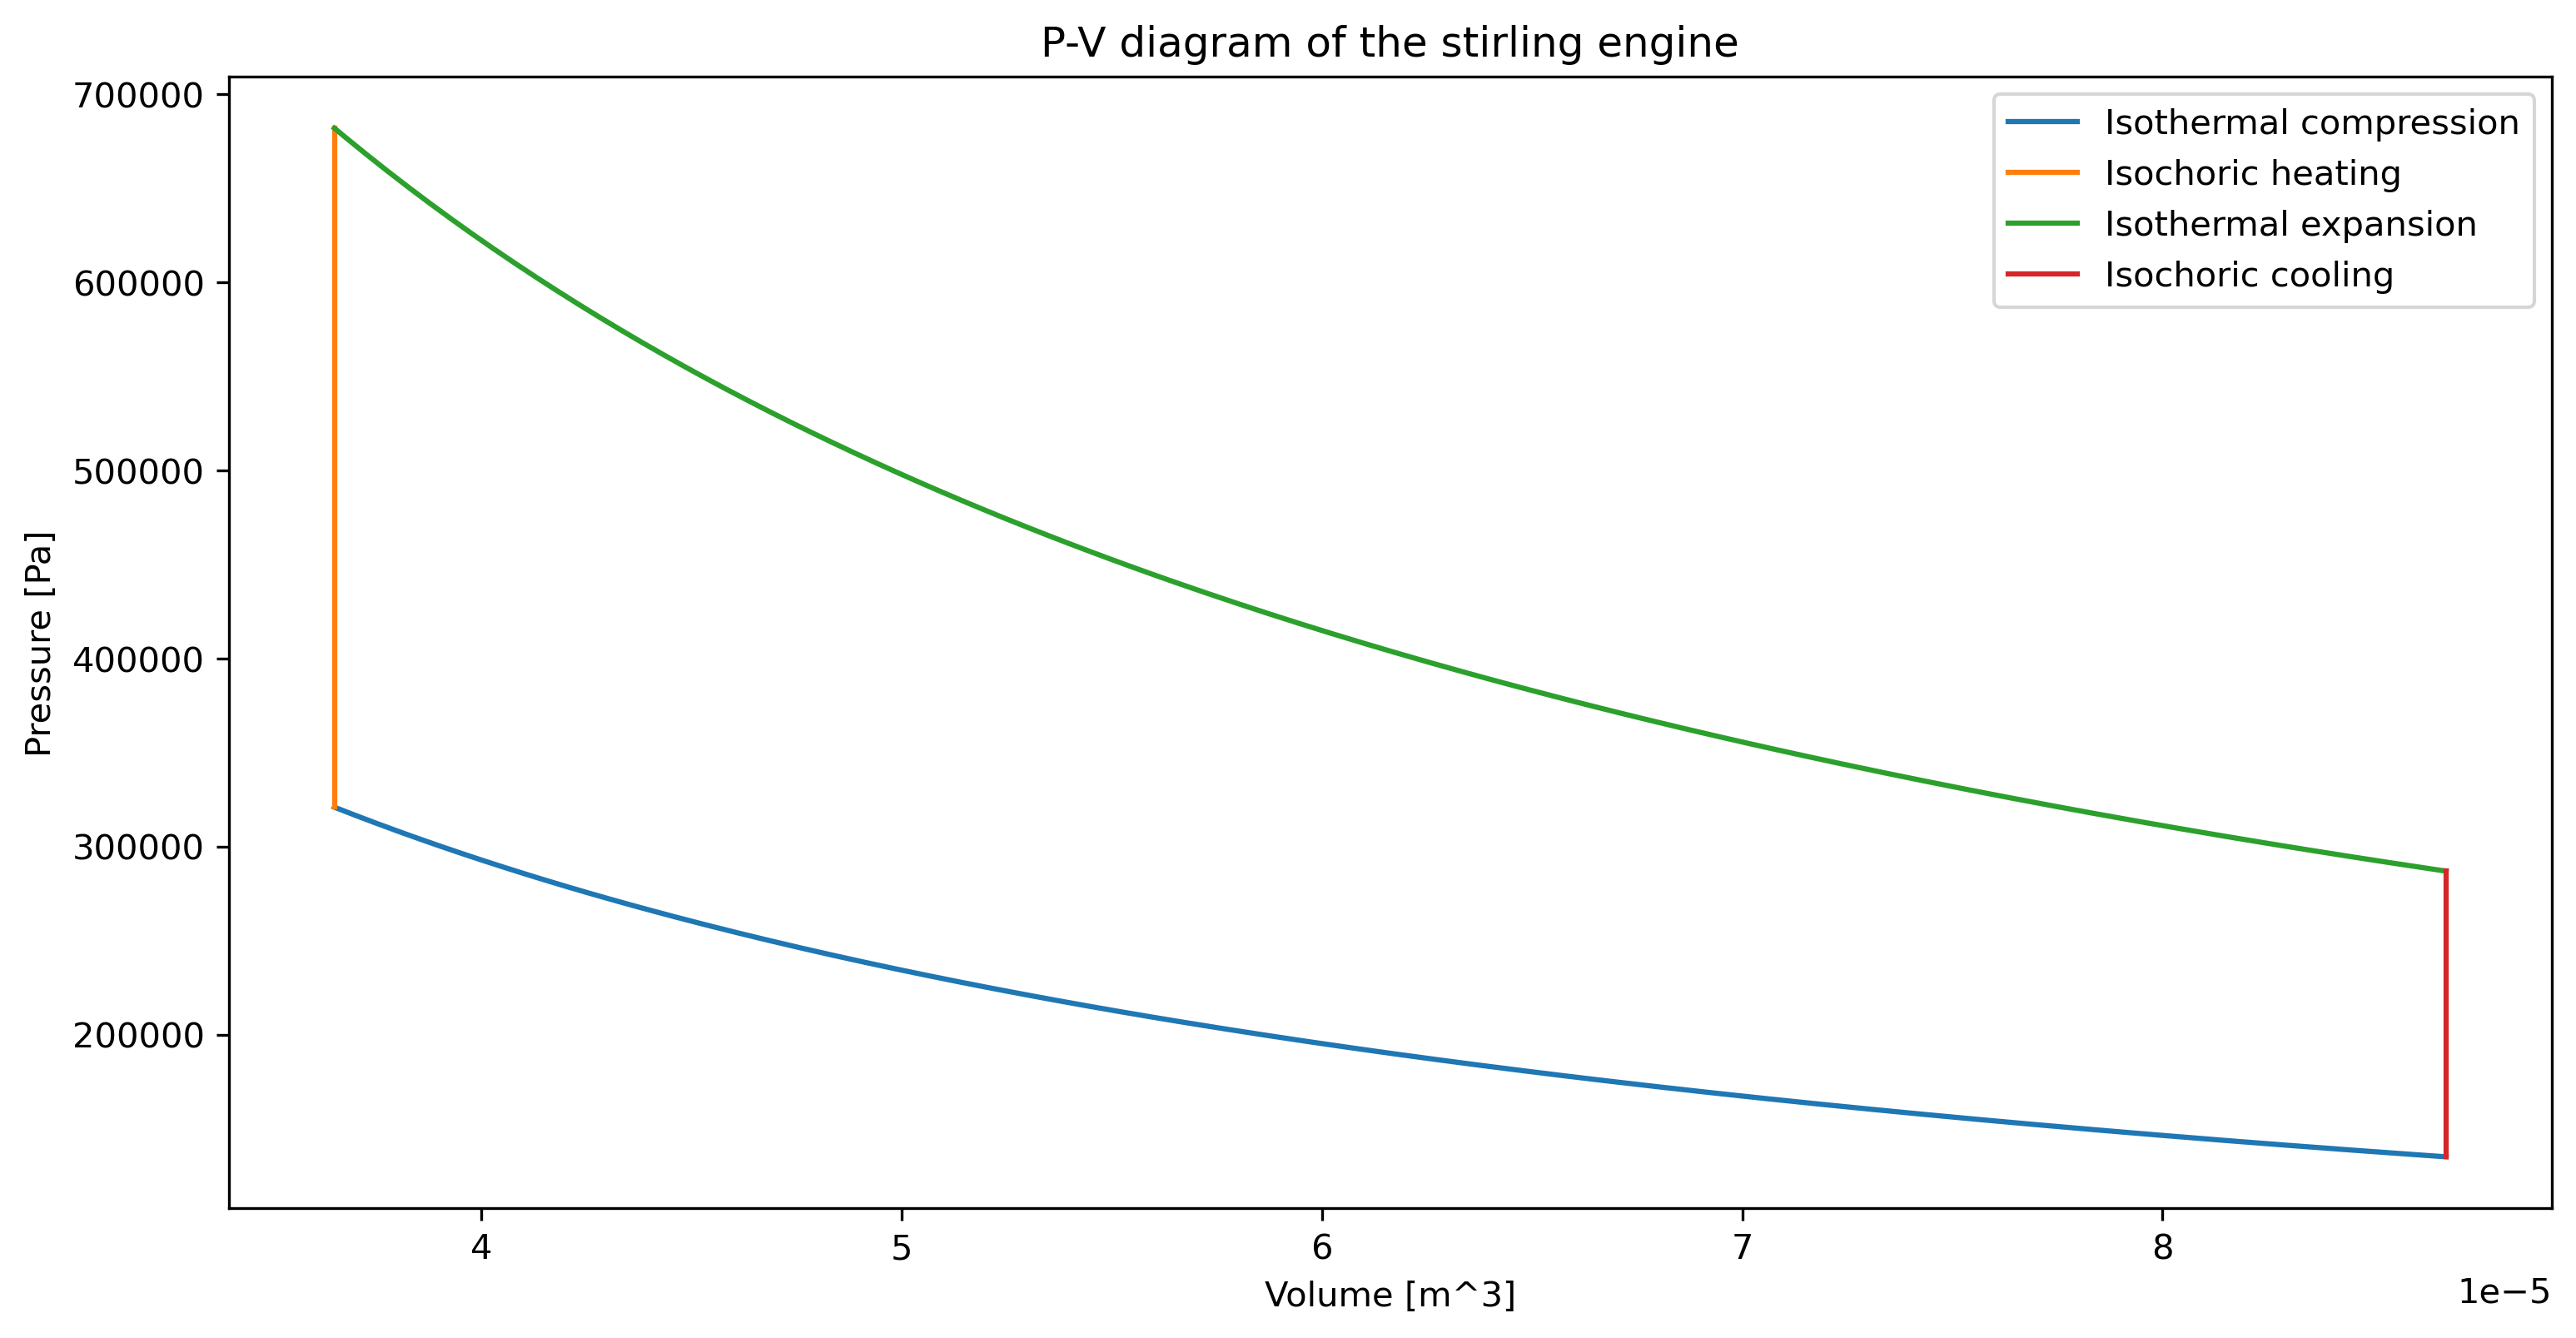

In [39]:
fig1, ax1 = plt.subplots(figsize = (12,6), dpi = 300)
plt.plot(V_2, P_2)
plt.plot(V_3, P_3)
plt.plot(V_1, P_1)
plt.plot(V_4, P_4)

plt.title("P-V diagram of the stirling engine")
plt.ylabel("Pressure [Pa]")
plt.xlabel("Volume [m^3]")
plt.legend(["Isothermal compression", "Isochoric heating ", "Isothermal expansion", "Isochoric cooling"])
plt.show()

**11- What is the net work Wnet of the machine?**

In [ ]:
Qin = Q[1] + Q[2] #extracting the second and third values in the array, the positive values
float("{0:.2f}".format(Qin)) #Qin in joules

In [ ]:
Qout = Q[0] + Q[3] #extracting the first and fourth values in the array, the negative values
float("{0:.2f}".format(Qout)) #Qout in joules

In [ ]:
Wnet = Qin + Qout #or |Wnet| = |Qin| - |Qout|
float("{0:.2f}".format(Wnet)) #joules

**12- What is the heat input Qin from the hot reservoir and the energy loss Qout to the cold reservoir?**

In [ ]:
float("{0:.2f}".format(Qin)) #joules

In [ ]:
float("{0:.2f}".format(Qout)) #joules

**13- What is the efficiency η of that machine?**

In [ ]:
η = abs((Wnet)/Qin) #Wnet is the useful energy and Qin is the fuel that makes
               #this machine work either oil, coal or other..
               #abs absolute values to get positive result
float("{0:.2f}".format(η))

20.9% efficiency

In [ ]:
#we can calculate it this way also
η = (1-(abs(Qout/Qin))) #abs absolute values to get positive result
float("{0:.2f}".format(η))

**14- Write a program in Python to be able to re-calculate all calculations easily when changing parameters. The following parameters should be modifiable: Lower and upper volume, lower and upper temperature, number of moles of diatomic working gas.**

This task is already completed in task number 10, 11, 12 and 13.

**15- The efficiency of an ideal Carnot machine depends on the two temperatures Tc and Th. Draw the efficiency as a function of Th (from 400K to 850K). Of course, it is not linearly dependent on temperature. This means, if you double the temperature difference you are not doubling the efficiency.**

After implementing all the values in the efficiency formula, we will get: y = η: y = 1-Tc/Th

In [33]:
import matplotlib.pyplot as plt

In [34]:
Tc = 400 #Kelvin

In [35]:
Th = np.arange(400,850,0.2) #Kelvin

In [36]:
def y(Th, Tc = 400):
    return 1-Tc/Th

In [37]:
y=y(Th)

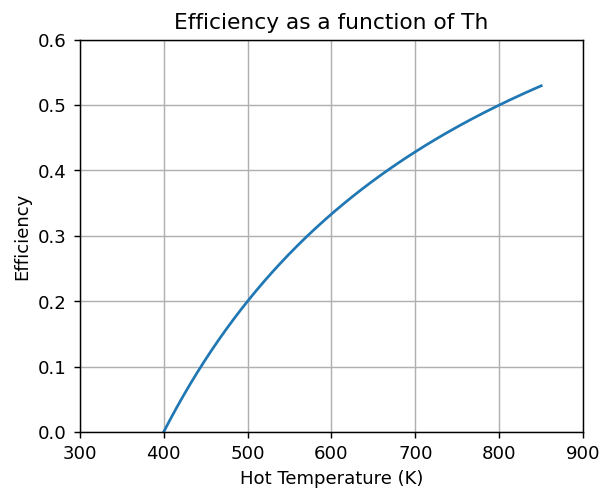

In [38]:
fig2, ax = plt.subplots(figsize=(5,4), dpi=130)
ax.plot(Th,y)
ax.set_xlabel("Hot Temperature (K)")
ax.set_ylabel("Efficiency")
ax.set_xlim([300,900])
ax.set_ylim([0,0.6])
ax.set_title("Efficiency as a function of Th")
ax.grid(True)
plt.show()

**16- Assume simply average annual conditions. You do not have to take irradiance variations (day time, season, weather) into account. Assume you had a mirrored dish following the sun and assume that the collected power by the dish is completely redirected to the hot end (the hot reservoir Th) of the Stirling engine. How large has the dish to be (on average) to able to provide Qin (on average)?**

As stated in the question in a simple answer: the sun transfers in each second an amount of 1367 J on each square meter of the Earth's diameter. This corresponds to a power of 1367 Watt. [2]<br>
In order to have 54 joules/s, the dish should be 54*1/1367 = 0.042 m² or 420 cm²

**References:**

1- https://www.currentresults.com/Weather-Extremes/Europe/sunniest-cities.php<br>
2- The Sun transfers in each second and amount of 1367 J on each square metre of the Earth's diameter. This corresponds to a power of 1367 Watt